# Mentoring 1 - Introduction to Machine Learning
---

Mentoring Session - Job Preparation Program - Pacmann AI

## Instructions
---

1. Please fill all the given tasks in here
2. You can use any library
3. For modeling, please use `sklearn` library
4. You are taksed to create a function based machine learning model. (If you cannot create the functions from the start, you can create without a function first, then put it all into a function)
5. Make sure you are following all the function descriptions
6. Submit your result to the submission form

## Dataset Description
---

**Note**

- This dataset originally comes from [Uber Fares Dataset](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset)
- We perform several edit for this mentoring purposes. So, please use the dataset from [here](https://drive.google.com/file/d/1-Fr3OMbI1yKU_jNy-6cgXFJDVzjph3sn/view?usp=sharing).


**Description**
- We're looking to predict the fare of Uber's transactions.
- The dataset contains of the following fields

<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`order_id`| `int` | a unique identifier for each trip|
|`pickup_time` | `str` | a class of pickup time. `04-10`, `10-16`, `16-22`, `22-04`. E.g. `04-10` means the pickup time is between 04.00 to 10.00|
| `pickup_longitude` | `float` | the longitude where the meter was engaged|
| `pickup_latitude` | `float` | the latitude where the meter was engaged|
| `dropoff_longitude` | `float` | the longitude where the meter was disengaged|
| `dropoff_latitude` | `float` | the latitude where the meter was disengaged|
| `passenger_count` | `float` | the number of passengers in the vehicle (driver entered value)|
| `fare_amount` | `int` | the cost of each trip in USD, (**our target**)|

## Modeling Workflow
---

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
```

### 1. Import data to Python (10 pts)
---

In [1]:
####################################################
# Import Numpy and Pandas library
# Write your code here
####################################################
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ubah direktori kerja ke folder di Google Drive
os.chdir('/content/drive/My Drive')

In [4]:
####################################################
# Create a function named read_data
# - Has an input of filename, i.e. fname
# - Read the data as a Pandas DataFrame
# - Drop duplicate on `order_id`, keep the last ones
# - Set `order_id` as index
# - Print the data shape
# - Return the dataset
# Write your code here
####################################################
def read_data(fname):
  """
  read file names from data_file (data_file = [])

  Return:
  data_file
  """
  #read the data
  data = pd.read_csv(fname)

  #drop duplicate value
  data = data.drop_duplicates()

  #Describe the Data
  print(f"Data shape raw                  : {data.shape}")
  print(f"Number of duplicate order id    : {data['order_id'].duplicated().sum()}")
  print(f"Data shape after dropping       : {data.shape}")

  #Reset Data Index
  data.set_index('order_id', inplace=True)
  # Data Final after reset the index
  print(f"Data shape final                : {data.shape}")

  #Return the Data
  return data

In [5]:
# Read the Uber data (JUST RUN THE CODE)
data = read_data(fname='uber_edit.csv')

Data shape raw                  : (194814, 8)
Number of duplicate order id    : 0
Data shape after dropping       : (194814, 8)
Data shape final                : (194814, 7)


In [6]:
# JUST RUN THE CODE
data.head()

,fare_amount,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,,
24238194,7.5,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,7.7,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,12.9,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,5.3,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16.0,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


### 2. Data Preprocessing (60 pts)
---

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Separate Numerical and Categorical Features
2.4 Numerical Imputation
2.5 Categorical Imputation
2.6 Preprocess Categorical Features
2.7 Join the Data
2.8 Feature Engineering the Data
2.9 Create a Preprocessing Function
```

#### 2.1. Input-Output Split (6 pts)
---

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [7]:
####################################################
# Create a function named split_input_output
# - Has two arguments
#   - data, a pd Dataframe
#   - target_col, a column (str)
# - Print the data shape after splitting
# - Return X, y
# Write your code here
####################################################
def split_input_output(data: pd.DataFrame, target_col: str):
    """
    Splits a DataFrame into features (X) and target (y).

    Args:
    - data (pd.DataFrame): The input DataFrame.
    - target_col (str): The name of the target column.

    Returns:
    - X (pd.DataFrame): DataFrame of features (all columns except target).
    - y (pd.Series): Series of the target column.
    """
    X = data.drop(columns=[target_col])  # Drop the target column to get features
    y = data[target_col]  # Extract the target column

    # Print shapes
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    return X, y

In [8]:
# Load the train data only (JUST RUN THE CODE)
X, y = split_input_output(data=data,
                          target_col='fare_amount')

X shape: (194814, 6)
y shape: (194814,)


In [9]:
X.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
24238194,16-22,-73.999817,40.738354,-73.999512,40.723217,1.0
27835199,16-22,-73.994355,40.728225,-73.994710,40.750325,1.0
44984355,16-22,-74.005043,40.740770,-73.962565,40.772647,1.0
25894730,04-10,-73.976124,40.790844,-73.965316,40.803349,3.0
17610152,16-22,-73.925023,40.744085,-73.973082,40.761247,5.0


In [10]:
y.head()  # (JUST RUN THE CODE)

,fare_amount
order_id,
24238194,7.5
27835199,7.7
44984355,12.9
25894730,5.3
17610152,16.0


#### 2.2. Train-Valid-Test Split (6 pts)
---

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [11]:
####################################################
# Create a function named split_train_test
# - Has two arguments
#   - X, the input (pd.Dataframe)
#   - y, the output (pd.Dataframe)
#   - test_size, the test size between 0-1 (float)
#   - seed, the random state (int)
# - Print the data shape after splitting
# - Return X_train, X_test, y_train, y_test
# - You can use an sklearn library to help you
# Write your code here
####################################################

def split_train_test(X: pd.DataFrame, y: pd.Series, test_size: float, seed: int):
    """
    Splits the data into training and test datasets with rounding to the nearest integer.

    Args:
    - X (pd.DataFrame): The input features.
    - y (pd.Series): The target output.
    - test_size (float): The proportion of the data to include in the test split (between 0 and 1).
    - seed (int): The random seed for reproducibility.

    Returns:
    - X_train (pd.DataFrame): Training features.
    - X_test (pd.DataFrame): Test features.
    - y_train (pd.Series): Training target.
    - y_test (pd.Series): Test target.
    """
    # Set random seed for reproducibility
    np.random.seed(seed)

    # Generate a shuffled index
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Calculate the number of test samples and round it to the nearest integer
    test_count = np.round(len(X) * test_size,0).astype(int)  # Ensure rounding down to the nearest integer
    train_count = len(X) - test_count  # Remaining samples for training

    # Split the indices
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    # Create train-test splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Print shapes
    print(f"X train shape: {X_train.shape}")
    print(f"y train shape: {y_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"y test shape: {y_test.shape}")
    print(' ')
    return X_train, X_test, y_train, y_test

In [12]:
# Split the data
# First, split the train & not train
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size=0.20, seed=123)

# Then, split the valid & test
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, test_size=0.50, seed=123)

X train shape: (155851, 6)
y train shape: (155851,)
X test shape: (38963, 6)
y test shape: (38963,)
 
X train shape: (19481, 6)
y train shape: (19481,)
X test shape: (19482, 6)
y test shape: (19482,)
 


In [13]:
# Validate (JUST RUN THE CODE)
print(len(X_train)/len(X))  # should be 0.8
print(len(X_valid)/len(X))  # should be 0.1
print(len(X_test)/len(X))   # should be 0.1

0.7999989733797366
0.09999794675947314
0.1000030798607903


In [14]:
X_train.head()  # (JUST RUN THE CODE)

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0


#### 2.3. Separate Numerical and Categorical Features (6 pts)
---

- We now prepare to perform data preprocessing
- But, we first separate the data into numerical data & categorical data.

In [15]:
####################################################
# Create a function to split numerical & categorical input
# - you have three parameters
#   - data, an input data (pd. Dataframe)
#   - num_cols, a list of numerical columns (list)
#   - cat_cols, a list of categorical columns (list)
# - and write a validation that you perform right operation
# - and return two dataframe, numerical & categorical data
# Write your code here
####################################################
def split_numerical_categorical(data, num_cols, cat_cols):
    """
    This function splits the input DataFrame into two DataFrames:
    one containing the numerical columns and the other containing
    the categorical columns.

    Parameters:
    data (pd.DataFrame): The input DataFrame to split.
    num_cols (list): A list of column names that are numerical.
    cat_cols (list): A list of column names that are categorical.

    Returns:
    tuple: A tuple containing two DataFrames:
        - X_num: DataFrame with numerical columns.
        - X_cat: DataFrame with categorical columns.

    Raises:
    ValueError: If any column in `num_cols` is not found in the DataFrame
                or is not of numeric type, or if any column in `cat_cols`
                is not found or is not of categorical type.
    """

    # Validate the numerical columns
    for col in num_cols:
        # Check if the column is in the DataFrame
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in the data.")
        # Check if the column has a numeric data type
        if not pd.api.types.is_numeric_dtype(data[col]):
            raise ValueError(f"Column '{col}' is not numerical.")

    # Validate the categorical columns
    for col in cat_cols:
        # Check if the column is in the DataFrame
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in the data.")
        # Check if the column has a categorical or object data type
        if not pd.api.types.is_categorical_dtype(data[col]) and not data[col].dtype == 'object':
            raise ValueError(f"Column '{col}' is not categorical.")

    # Split the data into numerical and categorical DataFrames
    X_num = data[num_cols]  # Select only the numerical columns
    X_cat = data[cat_cols]  # Select only the categorical columns

    print(f"Data num shape: {X_num.shape}")
    print(f"Data cat shape: {X_cat.shape}")

    # Return the split DataFrames
    return X_num, X_cat

num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [16]:
# Split the data
X_train_num, X_train_cat = split_numerical_categorical(X_train, num_cols, cat_cols)

Data num shape: (155851, 5)
Data cat shape: (155851, 1)


In [17]:
X_train_num.head()  # (JUST RUN THE CODE)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
order_id,,,,,
51655713,-73.979392,40.735734,-73.906281,40.745539,2.0
37525839,-73.986575,40.761473,-73.981880,40.768660,5.0
55058970,-73.972533,40.782260,-73.952761,40.708980,1.0
15663447,-73.979967,40.751612,-73.976313,40.758427,6.0
13325650,-73.976192,40.744026,-73.980935,40.733946,1.0


In [18]:
X_train_cat.head()  # (JUST RUN THE CODE)

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


#### EDA before Preprocessing (JUST RUN THE CODE)
---

- Find the number of missing values

In [19]:
100 * (X_train.isna().sum(0) / len(X_train))

,0
pickup_time,0.000000
pickup_longitude,0.000000
pickup_latitude,0.000000
dropoff_longitude,0.000000
dropoff_latitude,0.000000
passenger_count,0.606348


- We will impute all these variables if there is any missing value

- First, check the numerical features distribution

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

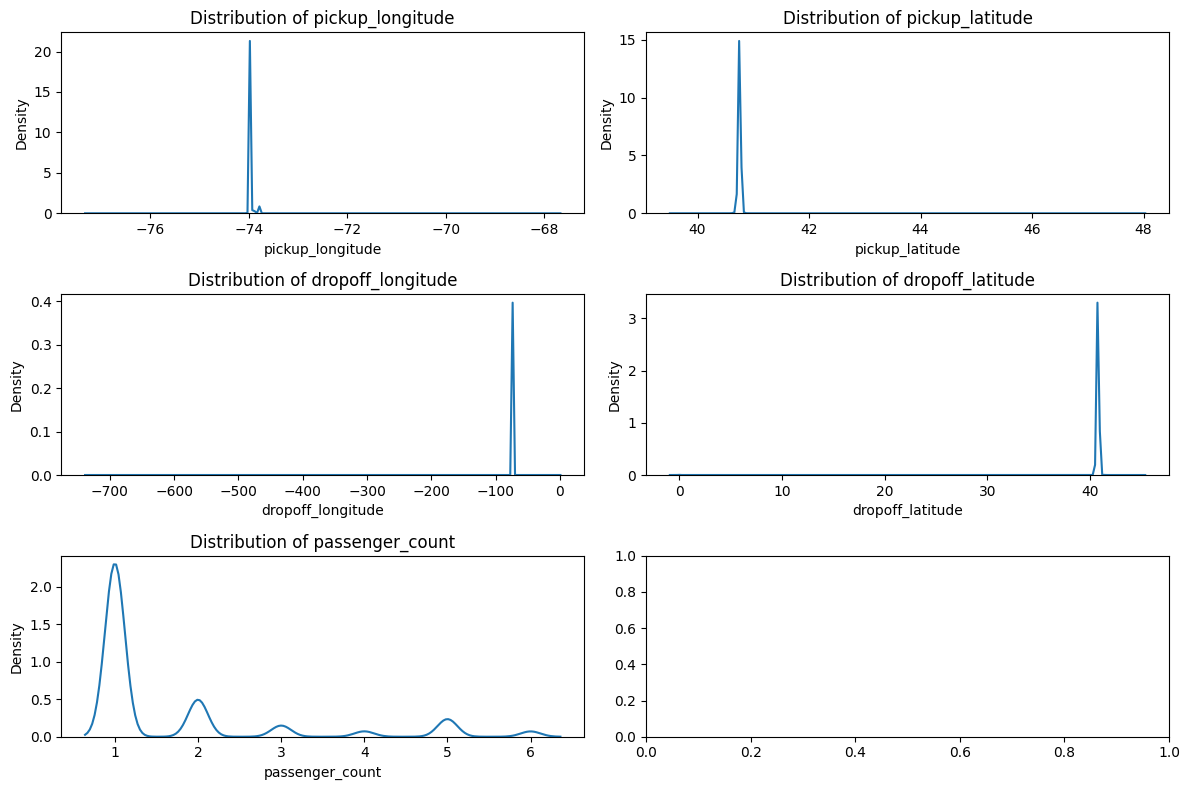

In [21]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- All the distribution are skewed, we can impute a missing value by its features median.

- Next, explore the `pickup_time`

In [22]:
X_train['pickup_time'].value_counts(normalize=True)

,proportion
pickup_time,
16-22,0.328160
10-16,0.286376
22-04,0.221648
04-10,0.157599
-,0.006217


- There's a missing value with symbol `'-'` in `pickup_time`,
- We can impute the missing value with `UNKNOWN`

- Explore the relation between `pickup_time` and `fare`

In [23]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,pickup_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
order_id,,,,,,,
51655713,16-22,-73.979392,40.735734,-73.906281,40.745539,2.0,16.5
37525839,16-22,-73.986575,40.761473,-73.981880,40.768660,5.0,3.7
55058970,16-22,-73.972533,40.782260,-73.952761,40.708980,1.0,18.9
15663447,10-16,-73.979967,40.751612,-73.976313,40.758427,6.0,4.1
13325650,16-22,-73.976192,40.744026,-73.980935,40.733946,1.0,5.0


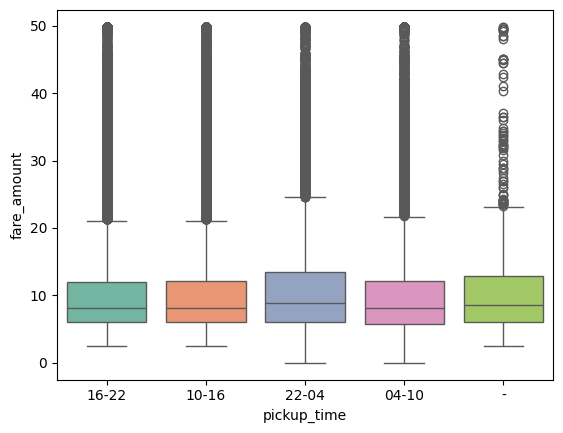

In [24]:
# Create a boxplot
sns.boxplot(data=train_data[train_data['fare_amount'] < 50],
            x='pickup_time',
            y='fare_amount',
            palette = 'Set2')
plt.show()

- There is no significant fare different between `pickup_time`.
- We can perform a one hot encoding for this data.

## **Conclusion for preprocessing**
- Impute the missing `passenger_counts` with its median
- Impute the missing `pickup_time` with `'UNKNOWN'`
- Feature engineering the `dropoff` and `pickup` coordinate to be a distance between pickup and dropoff. We can use an Euclidean distance for simplicity.

#### 2.4. Numerical Imputation (6 pts)
---

- Now, let's perform a numerical imputation
- First check the missing value of the numerical data

In [25]:
# Check missing value (JUST RUN THE CODE)
X_train_num.isna().sum(0)

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,945


- Create a function to fit a numerical features imputer

In [26]:
####################################################
# Create function to fit & transform numerical imputers
# The fit function is called by num_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is np.nan
# - the imputation strategy is median
# - it return the imputer
#
# The transform function is called by num_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
from sklearn.impute import SimpleImputer
def num_imputer_fit(X: pd.DataFrame):
    """
    Fit the numerical imputer to the dataset using the median strategy.

    Args:
    - X (pd.DataFrame): The input data with missing values to be imputed.

    Returns:
    - imputer (SimpleImputer): The fitted imputer object.
    """
    imputer = SimpleImputer(strategy='median')
    imputer.fit(X)
    return imputer

####################################################
# Function to transform the data
# The transform function is called by num_imputer_transform
# - it needs 2 inputs, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
def num_imputer_transform(X: pd.DataFrame, imputer):
    """
    Transform the dataset by imputing missing values using the fitted imputer.

    Args:
    - X (pd.DataFrame): The input data with missing values to be imputed.
    - imputer (SimpleImputer): The fitted imputer object to apply to the data.

    Returns:
    - X_imputed (pd.DataFrame): The data with missing values imputed.
    """
    X_imputed = imputer.transform(X)
    return pd.DataFrame(X_imputed, columns=X.columns)

- Perform imputation

In [27]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_num)

# Transform the data
X_train_num_imputed = num_imputer_transform(X_train_num, num_imputer)

In [28]:
# Validate (JUST RUN THE CODE)
X_train_num_imputed.isna().sum(0)

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


Great!

#### 2.5. Categorical Imputation (6 pts)
---

- Next, let's perform the categorical imputation

In [29]:
# Check missing value (JUST RUN THE CODE)
X_train_cat.value_counts(normalize=True)

,proportion
pickup_time,
16-22,0.328160
10-16,0.286376
22-04,0.221648
04-10,0.157599
-,0.006217


In [30]:
X_train_cat.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


- Create a function to fit a categorical features imputer

In [31]:
####################################################
# Create function to fit & transform categorical imputers
# The fit function is called by cat_imputer_fit
# - it needs 1 input, the data (pd.DataFrame)
# - the missing value is '-'
# - the imputation strategy is filling it with 'UNKNOWN'
# - it return the imputer
#
# The transform function is called by cat_imputer_transform
# - it needs 2 input, data (pd.DataFrame) and imputer (sklearn object)
# - it return the imputed data in pd.DataFrame format
#
# Write your code here
####################################################
def cat_imputer_fit(data: pd.DataFrame):
    """
    Fits the imputer to the given categorical data.

    Parameters:
    - data: pd.DataFrame: The input data with categorical features (may contain missing values represented by '-').

    Returns:
    - imputer: The fitted SimpleImputer object.
    """
    # Replace '-' with NaN
    data = data.replace('-', np.nan)

    # Initialize the SimpleImputer with strategy='constant' to fill missing values with 'UNKNOWN'
    imputer = SimpleImputer(strategy='constant', fill_value='UNKNOWN')

    # Fit the imputer on the provided data
    imputer.fit(data)

    return imputer

# Transform function
def cat_imputer_transform(data: pd.DataFrame, imputer):
    """
    Transforms the data by imputing missing values using the provided imputer.

    Parameters:
    - data: pd.DataFrame: The input data to be transformed (may contain missing values represented by '-').
    - imputer: The fitted SimpleImputer object.

    Returns:
    - imputed_data: pd.DataFrame: The data with missing values imputed.
    """
    # Replace '-' with NaN before transforming
    data = data.replace('-', np.nan)

    # Transform the data by applying the fitted imputer
    imputed_data = imputer.transform(data)

    # Convert the result to a DataFrame
    imputed_data = pd.DataFrame(imputed_data, columns=data.columns, index=data.index)

    return imputed_data

- Perform imputation

In [32]:
# Perform categorical imputation
cat_imputer = cat_imputer_fit(X_train_cat)

# Transform
X_train_cat_imputed = cat_imputer_transform(X_train_cat, cat_imputer)

In [33]:
# Validate (JUST RUN THE CODE)
X_train_cat_imputed.value_counts(normalize=True)

,proportion
pickup_time,
16-22,0.328160
10-16,0.286376
22-04,0.221648
04-10,0.157599
UNKNOWN,0.006217


Great!

#### 2.6. Preprocess Categorical Features (6 pts)
---

- We will create a one-hot-encoder (read the `EDA before processing`) for the categorical features
- Create a function to perform a one hot encoder

In [34]:
####################################################
# Write two functions to perform OHE for the categorical data
# The first function is called cat_encoder_fit
# - It needs 1 input, the data (pd.DataFrame)
# - You create an encoder (from OHE Sklearn)
# - input all categories of the categorical data
# - if there is other category outside the categories listed right now, ignore it
# - return the encoder
#
# The second function is called cat_encoder_transfrom
# - It needs two input, the data (pd.DataFrame), the encoder (sklearn object)
# - It transform the input data based on the encoder
# - It returns the encoded data (pd.DataFrame)
#
# Write your code here
####################################################
from sklearn.preprocessing import OneHotEncoder

def cat_encoder_fit(data: pd.DataFrame):
    """
    Fits the OneHotEncoder to the given categorical data.

    Parameters:
    - data: pd.DataFrame: The input categorical data.

    Returns:
    - encoder: The fitted OneHotEncoder object.
    """
    # Initialize the OneHotEncoder with handle_unknown='ignore' to ignore unknown categories during transformation
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    # Fit the encoder on the categorical data
    encoder.fit(data)

    return encoder

# Transform function for One-Hot Encoding
def cat_encoder_transform(data: pd.DataFrame, encoder):
    """
    Transforms the data by applying One-Hot Encoding using the provided encoder.

    Parameters:
    - data: pd.DataFrame: The input data to be transformed.
    - encoder: The fitted OneHotEncoder object.

    Returns:
    - encoded_data: pd.DataFrame: The data with One-Hot Encoding applied.
    """
    # Transform the data using the fitted encoder
    encoded_data = encoder.transform(data)

    # Get the feature names (category names) from the encoder
    feature_names = encoder.get_feature_names_out(data.columns)

    # Split the feature names to keep only the category part (remove the original column name)
    # Example: "pickup_time_16-22" -> "16-22"
    new_columns = [name.split('_')[-1] for name in feature_names]

    # Convert the result to a DataFrame with the new column names, preserving the original index
    encoded_data = pd.DataFrame(encoded_data, columns=new_columns, index=data.index)

    return encoded_data

- Perform imputation

In [35]:
# Perform categorical imputation
cat_encoder = cat_encoder_fit(X_train_cat_imputed)

# Transform
X_train_cat_encoded = cat_encoder_transform(X_train_cat_imputed, cat_encoder)

In [36]:
# Validate  (JUST RUN THE CODE)
print('Original shape:', X_train_cat_imputed.shape)
print('Encoded shape :', X_train_cat_encoded.shape)

Original shape: (155851, 1)
Encoded shape : (155851, 5)


In [37]:
# Validate  (JUST RUN THE CODE)
X_train_cat_encoded.head()

,04-10,10-16,16-22,22-04,UNKNOWN
order_id,,,,,
51655713,0.0,0.0,1.0,0.0,0.0
37525839,0.0,0.0,1.0,0.0,0.0
55058970,0.0,0.0,1.0,0.0,0.0
15663447,0.0,1.0,0.0,0.0,0.0
13325650,0.0,0.0,1.0,0.0,0.0


In [38]:
# Validate  (JUST RUN THE CODE)
X_train_cat_imputed.head()

,pickup_time
order_id,
51655713,16-22
37525839,16-22
55058970,16-22
15663447,10-16
13325650,16-22


Great!

#### 2.7. Join the data (6 pts)
---

- After all the data is filled (numerically), we can join the data
- Create a function to join the data

In [39]:
####################################################
# Create a function to join / concat the data
# The function is called by concat_data
# - It needs two input, num_data (pd.DataFrame) and cat_data (pd.DataFrame)
# - Don't forget to validate your process
# - It returns the concated data
#
# Write your code here
####################################################
def concat_data(num_data: pd.DataFrame, cat_data: pd.DataFrame):
    """
    Concatenates numerical and categorical data, ensuring that the indices match.

    Parameters:
    - num_data: pd.DataFrame: The numerical data.
    - cat_data: pd.DataFrame: The categorical data.

    Returns:
    - concated_data: pd.DataFrame: The concatenated data.
    """
    # Validate that both DataFrames have the same number of rows and matching indices
    if num_data.shape[0] != cat_data.shape[0]:
        raise ValueError("The number of rows in the numerical and categorical data do not match.")

    if not num_data.index.equals(cat_data.index):
        # Ensure the indices match by aligning them
        cat_data = cat_data.set_index(num_data.index)

    # Concatenate the numerical and categorical data along columns (axis=1)
    concated_data = pd.concat([num_data, cat_data], axis=1)

    print("Numerical data shape  :", num_data.shape)
    print("Categorical data shape:", cat_data.shape)
    print("Concat data shape     :", concated_data.shape)
    return concated_data

- Perform concatenated

In [40]:
# Concat the data
X_train_concat = concat_data(X_train_num_imputed, X_train_cat_encoded)

Numerical data shape  : (155851, 5)
Categorical data shape: (155851, 5)
Concat data shape     : (155851, 10)


In [41]:
# Validate (JUST RUN THE CODE)
X_train_concat.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN
0,-73.979392,40.735734,-73.906281,40.745539,2.0,0.0,0.0,1.0,0.0,0.0
1,-73.986575,40.761473,-73.981880,40.768660,5.0,0.0,0.0,1.0,0.0,0.0
2,-73.972533,40.782260,-73.952761,40.708980,1.0,0.0,0.0,1.0,0.0,0.0
3,-73.979967,40.751612,-73.976313,40.758427,6.0,0.0,1.0,0.0,0.0,0.0
4,-73.976192,40.744026,-73.980935,40.733946,1.0,0.0,0.0,1.0,0.0,0.0


Great!

#### 2.8. Feature engineering the data (8 pts)
---

- Now, `pickup` and `dropoff` coordinate is not an explicit features.
- We can create a better feature called by `distance` to summarize the `pickup` and `dropoff` coordinate.

In [42]:
####################################################
# Create a function that obtain the distance
# The function is called with map_distance
# - It needs an input, data (pd.DataFrame)
# - In the input, you calculate the trip distance using Euclidean Distance
#   ref: https://www.cuemath.com/euclidean-distance-formula/
# - Then, you can save the distance information as a new column, 'distance'
# - And you can drop the pickup and dropoff latitude and longitude
# - You return the mapped data
#
# Write your code here
####################################################
def map_distance(data: pd.DataFrame):
    """
    Calculates the Euclidean distance between pickup and dropoff points based on latitude and longitude.

    Parameters:
    - data: pd.DataFrame: The input data containing pickup and dropoff latitudes and longitudes.

    Returns:
    - mapped_data: pd.DataFrame: The data with the distance column added and the latitude and longitude columns removed.
    """
    # Print the original data shape
    print("Original data shape:", data.shape)

    # Menghitung jarak Euclidean antara titik pickup dan dropoff
    mapped_data = data.copy()
    mapped_data['distance'] = np.sqrt(
        (mapped_data['dropoff_longitude'] - mapped_data['pickup_longitude']) ** 2 +
        (mapped_data['dropoff_latitude'] - mapped_data['pickup_latitude']) ** 2
    )

    # Tentukan kolom latitude dan longitude yang ingin dihapus setelah perhitungan
    columns_to_drop = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

    # Menghapus kolom latitude dan longitude
    mapped_data = mapped_data.drop(columns=columns_to_drop)

    # Print the mapped data shape
    print("Mapped data shape  :", mapped_data.shape)

    return mapped_data

- Perform distance calculation (4 pts)

In [43]:
# Calculate the distance
X_train_concat_fe = map_distance(X_train_concat)

Original data shape: (155851, 10)
Mapped data shape  : (155851, 7)


In [44]:
# Validate (JUST RUN THE CODE)
X_train_concat_fe.head()

,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
0,2.0,0.0,0.0,1.0,0.0,0.0,0.073766
1,5.0,0.0,0.0,1.0,0.0,0.0,0.008585
2,1.0,0.0,0.0,1.0,0.0,0.0,0.075901
3,6.0,0.0,1.0,0.0,0.0,0.0,0.007733
4,1.0,0.0,0.0,1.0,0.0,0.0,0.011140


- And finally, we standardize the data so that it can perform well during model optimization (4 pts)

In [45]:
####################################################
# Create two functions to perform scaling & transform scaling
# The scaling is Standardization
# The first function is to fit the scaler, called by fit_scaler
# - You need an input, a data (pd.Dataframe)
# - You create a standardization scaler (please use sklearn)
# - Your output is the scaler
#
# The second function is to transform data using scaler, called by transform_scaler
# - There are two inputs, a data (pd.Dataframe), a scaler (sklearn object)
# - You scaled the data, then return the scaled data
# Write your code here
####################################################
# Function to fit the scaler
from sklearn.preprocessing import StandardScaler
def fit_scaler(data: pd.DataFrame):
    """
    Fits the standard scaler to the given data.

    Parameters:
    - data: pd.DataFrame: The input data to be standardized.

    Returns:
    - scaler: The fitted StandardScaler object.
    """
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler

# Function to transform data using the fitted scaler
def transform_scaler(data: pd.DataFrame, scaler):
    """
    Transforms the data by applying standard scaling using the provided scaler.

    Parameters:
    - data: pd.DataFrame: The input data to be scaled.
    - scaler: The fitted StandardScaler object.

    Returns:
    - scaled_data: pd.DataFrame: The scaled data.
    """
    scaled_data = scaler.transform(data)
    # Convert the scaled data back to a DataFrame
    scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)
    return scaled_data

In [46]:
# Fit the scaler
scaler = fit_scaler(X_train_concat_fe)

# Transform the scaler
X_train_clean = transform_scaler(X_train_concat_fe, scaler)

In [47]:
# Validate (JUST RUN THE CODE)
X_train_clean.describe().round(4)

,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
count,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000,155851.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0383
25%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0340
50%,-0.5267,-0.4325,-0.6335,-0.6989,-0.5336,-0.0791,-0.0311
75%,0.2412,-0.4325,1.5786,1.4308,-0.5336,-0.0791,-0.0256
max,3.3130,2.3120,1.5786,1.4308,1.8739,12.6427,218.5245


Great!

#### 2.9. Create the preprocess function (10 pts)
---

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [48]:
####################################################
# Create a function to preprocess the dataset
# You called the function preprocess_data
# - It needs many input
#   - data, pd.DataFrame
#   - num_cols, the numerical columns, list
#   - cat_cols, the categorical columns, list
#   - num_imputer, the numerical imputer, sklearn object
#   - cat_imputer, the categorical imputer, sklearn object
#   - cat_encoder, the categorical encoder, sklearn object
#   - scaler, the data scaler, sklearn object
# - You preprocess the data following step 2.3 - 2.8
# - You return the clean data
#
# Write your code here
####################################################

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_data(data, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler):
    """
    Preprocess the dataset by splitting the data, imputing missing values,
    encoding categorical variables, scaling numerical features, and returning
    the cleaned data.

    Parameters:
    - data (pd.DataFrame): The input data.
    - num_cols (list): A list of numerical columns.
    - cat_cols (list): A list of categorical columns.
    - num_imputer (sklearn.impute.SimpleImputer): Imputer for numerical columns.
    - cat_imputer (sklearn.impute.SimpleImputer): Imputer for categorical columns.
    - cat_encoder (sklearn.preprocessing.OneHotEncoder): Encoder for categorical columns.
    - scaler (sklearn.preprocessing.StandardScaler): Scaler for numerical columns.

    Returns:
    - cleaned_data (pd.DataFrame): The preprocessed and cleaned data.
    """
    # Step 2.3: Split data into numerical and categorical columns
    def split_numerical_categorical(data, num_cols, cat_cols):
        """
        Splits the data into numerical and categorical data based on the provided column names.
        """
        # Validate numerical columns
        for col in num_cols:
            if col not in data.columns:
                raise ValueError(f"Column '{col}' not found in the data.")
            if not pd.api.types.is_numeric_dtype(data[col]):
                raise ValueError(f"Column '{col}' is not numerical.")

        # Validate categorical columns
        for col in cat_cols:
            if col not in data.columns:
                raise ValueError(f"Column '{col}' not found in the data.")
            if not pd.api.types.is_categorical_dtype(data[col]) and not data[col].dtype == 'object':
                raise ValueError(f"Column '{col}' is not categorical.")

        # Split data
        X_num = data[num_cols]
        X_cat = data[cat_cols]
        return X_num, X_cat

    X_train_num, X_train_cat = split_numerical_categorical(data, num_cols, cat_cols)

    # Step 2.4: Impute missing values for numerical and categorical columns
    def impute_data(X_num, X_cat, num_imputer, cat_imputer):
        """
        Impute missing values for numerical and categorical columns.
        First, replace '-' with 'UNKNOWN' in categorical columns.
        """
        # Ganti nilai '-' dengan 'UNKNOWN' pada data kategori
        X_cat = X_cat.replace('-', 'UNKNOWN')

        # Lakukan imputasi
        X_num_imputed = num_imputer.fit_transform(X_num)
        X_cat_imputed = cat_imputer.fit_transform(X_cat)

        # Kembalikan data sebagai DataFrame dengan kolom yang sama seperti sebelumnya
        return pd.DataFrame(X_num_imputed, columns=X_num.columns), pd.DataFrame(X_cat_imputed, columns=X_cat.columns)

    X_train_num_imputed, X_train_cat_imputed = impute_data(X_train_num, X_train_cat, num_imputer, cat_imputer)

    # Step 2.5: Encode categorical data
    def encode_data(X_cat, cat_encoder):
        """
        Encode categorical columns using OneHotEncoder.
        """
        X_cat_encoded = cat_encoder.fit_transform(X_cat)

        # Get the column names from the encoder
        encoded_columns = cat_encoder.get_feature_names_out(X_cat.columns)

        # Remove the 'pickup_time_' prefix and 'time_' prefix from column names
        encoded_columns = [col.split('_', 1)[-1] for col in encoded_columns]

        X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoded_columns)
        return X_cat_encoded_df

    X_train_cat_encoded = encode_data(X_train_cat_imputed, cat_encoder)

    # Step 2.6: Concatenate numerical and categorical data
    def concat_data(X_num, X_cat):
        """
        Concatenate the numerical and categorical data.
        """
        return pd.concat([X_num, X_cat], axis=1)

    X_train_concat = concat_data(X_train_num_imputed, X_train_cat_encoded)

    # Step 2.7: Calculate Euclidean distance
    def map_distance(X_train_concat):
        """
        Calculate Euclidean distance between pickup and dropoff points based on latitude and longitude.
        """
        X_train_concat['distance'] = np.sqrt(
            (X_train_concat['dropoff_longitude'] - X_train_concat['pickup_longitude']) ** 2 +
            (X_train_concat['dropoff_latitude'] - X_train_concat['pickup_latitude']) ** 2
        )
        X_train_concat.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], inplace=True)
        return X_train_concat

    X_train_concat_fe = map_distance(X_train_concat)

    # Step 2.8: Standardize the data
    def scale_data(X_train_concat_fe, scaler):
        """
        Scale the numerical data using StandardScaler.
        """
        return pd.DataFrame(scaler.fit_transform(X_train_concat_fe), columns=X_train_concat_fe.columns)

    X_train_clean = scale_data(X_train_concat_fe, scaler)

    return X_train_clean

# Example usage:
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the imputation, encoding, and scaling objects
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_encoder = OneHotEncoder(sparse_output=False)  # Update to use sparse_output=False
scaler = StandardScaler()

In [49]:
# Preprocess the data training again
X_train_clean = preprocess_data(X_train, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler)
X_train_clean.columns = [col.replace('time_', '') for col in X_train_clean.columns]

In [50]:
# Validate (JUST RUN THE CODE)
print('Original data shape:', X_train.shape)
print('Cleaned data shape :', X_train_clean.shape)
X_train_clean.head()

Original data shape: (155851, 6)
Cleaned data shape : (155851, 7)


,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
0,0.238222,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013978
1,2.544020,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.035436
2,-0.530378,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.013275
3,3.312620,-0.432531,1.578579,-0.698891,-0.533634,-0.079097,-0.035716
4,-0.530378,-0.432531,-0.633481,1.430838,-0.533634,-0.079097,-0.034594


In [51]:
# Transform other set of data
X_valid_clean = preprocess_data(X_valid, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler)
X_test_clean = preprocess_data(X_test, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler)

X_valid_clean.columns = [col.replace('time_', '') for col in X_valid_clean.columns]
X_test_clean.columns = [col.replace('time_', '') for col in X_test_clean.columns]

In [52]:
X_valid_clean.head()

,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
0,-0.526779,-0.431344,-0.640098,-0.695162,1.879795,-0.078397,-0.041949
1,0.243450,-0.431344,-0.640098,1.438515,-0.531973,-0.078397,-0.036826
2,1.013680,-0.431344,1.562260,-0.695162,-0.531973,-0.078397,-0.041874
3,1.013680,-0.431344,1.562260,-0.695162,-0.531973,-0.078397,-0.035207
4,-0.526779,-0.431344,1.562260,-0.695162,-0.531973,-0.078397,-0.040711


In [53]:
X_valid_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19481 entries, 0 to 19480
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  19481 non-null  float64
 1   04-10            19481 non-null  float64
 2   10-16            19481 non-null  float64
 3   16-22            19481 non-null  float64
 4   22-04            19481 non-null  float64
 5   UNKNOWN          19481 non-null  float64
 6   distance         19481 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB


In [54]:
X_test_clean.head()

,passenger_count,04-10,10-16,16-22,22-04,UNKNOWN,distance
0,0.232613,-0.434340,-0.632512,1.439242,-0.537591,-0.07604,-0.040431
1,-0.529830,-0.434340,-0.632512,1.439242,-0.537591,-0.07604,-0.035774
2,-0.529830,-0.434340,-0.632512,-0.694810,1.860152,-0.07604,-0.026756
3,0.995056,2.302341,-0.632512,-0.694810,-0.537591,-0.07604,-0.036226
4,3.282384,-0.434340,-0.632512,-0.694810,1.860152,-0.07604,-0.031182


In [55]:
X_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  19482 non-null  float64
 1   04-10            19482 non-null  float64
 2   10-16            19482 non-null  float64
 3   16-22            19482 non-null  float64
 4   22-04            19482 non-null  float64
 5   UNKNOWN          19482 non-null  float64
 6   distance         19482 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB


### 3. Training Machine Learning Models (40 pts)
---

```
3.1 Prepare train & evaluate model function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare train & evaluate model function (10 pts)
---

- Before modeling, let's prepare function to train & evaluate model

In [56]:
####################################################
# First, create a function to train model called train_model
# - It needs 3 input
#   - estimator, the model (sklearn model)
#   - X_train, the input (pd.DataFrame)
#   - y_train, the output (pd.DataFrame)
# - You only fit the estimator using the X_train & y_train
# - Then return nothing
#
# Next, create a function to evaluate model called evaluate_model
# - It needs 5 input
#   - estimator, the model (sklearn model)
#   - X_train, the train input (pd.DataFrame)
#   - y_train, the train output (pd.DataFrame)
#   - X_valid, the valid input (pd.DataFrame)
#   - y_valid, the valid output (pd.DataFrame)
# - You calculate the model performance using root mean squared error metrics
# - Then return two output, rmse_train and rmse_valid
#
# Write your code here
####################################################
from sklearn.metrics import mean_squared_error
import numpy as np

def train_model(estimator, X_train, y_train):
    """
    Trains the given model using the provided training data.

    Parameters:
    - estimator: The model (sklearn model).
    - X_train (pd.DataFrame): The training input features.
    - y_train (pd.DataFrame): The training output/target.

    Returns:
    - None
    """
    estimator.fit(X_train, y_train)

def evaluate_model(estimator, X_train, y_train, X_valid, y_valid):
    """
    Evaluates the given model's performance on both the training and validation data using RMSE.

    Parameters:
    - estimator: The trained model (sklearn model).
    - X_train (pd.DataFrame): The training input features.
    - y_train (pd.DataFrame): The training output/target.
    - X_valid (pd.DataFrame): The validation input features.
    - y_valid (pd.DataFrame): The validation output/target.

    Returns:
    - rmse_train: RMSE on the training data.
    - rmse_valid: RMSE on the validation data.
    """
    # Predict on the training data
    y_train_pred = estimator.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predict on the validation data
    y_valid_pred = estimator.predict(X_valid)
    rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

    return rmse_train, rmse_valid

#### 3.2. Train and Evaluate Several Models (10 pts)
---

- Now, let's train & evaluate several models
- You should check, which one of the following model is the best model

  1. Baseline model
  2. k-NN with k=1
  3. k-NN with k=100
  4. k-NN with k=200
  5. k-NN with k=500
  6. k-NN with k=len(data)

In [57]:
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor

In [58]:
####################################################
# Create your model here (no need to create function)
# Write your code here
####################################################
reg_1 = DummyRegressor()  # Baseline model (dummy regressor)
reg_2 = KNeighborsRegressor(n_neighbors=1)   # k-NN with k=1
reg_3 = KNeighborsRegressor(n_neighbors=100) # k-NN with k=100
reg_4 = KNeighborsRegressor(n_neighbors=200) # k-NN with k=200
reg_5 = KNeighborsRegressor(n_neighbors=500) # k-NN with k=500
reg_6 = KNeighborsRegressor(n_neighbors=1000)  # k-NN with k=len(data)

In [59]:
# Train the model (JUST RUN THE CODE)
train_model(reg_1, X_train_clean, y_train)
train_model(reg_2, X_train_clean, y_train)
train_model(reg_3, X_train_clean, y_train)
train_model(reg_4, X_train_clean, y_train)
train_model(reg_5, X_train_clean, y_train)
train_model(reg_6, X_train_clean, y_train)

In [60]:
# Return validation (JUST RUN THE CODE)
import time

for reg in [reg_1, reg_2, reg_3, reg_4, reg_5, reg_6]:
    t0 = time.time()

    # Generate the rmse
    rmse_train, rmse_valid = evaluate_model(estimator=reg,
                                            X_train=X_train_clean,
                                            y_train=y_train,
                                            X_valid=X_valid_clean,
                                            y_valid=y_valid)

    # Logging
    elapsed = time.time() - t0
    print(f'model : {str(reg):40s} '
          f'| RMSE train: {rmse_train:.4f} '
          f'| RMSE valid: {rmse_valid:.4f} '
          f'| Time elapsed: {elapsed*1000:.2f} ms')

model : DummyRegressor()                         | RMSE train: 8.9221 | RMSE valid: 8.8614 | Time elapsed: 6.59 ms
model : KNeighborsRegressor(n_neighbors=1)       | RMSE train: 1.3978 | RMSE valid: 7.5417 | Time elapsed: 40353.70 ms
model : KNeighborsRegressor(n_neighbors=100)     | RMSE train: 3.9832 | RMSE valid: 5.5140 | Time elapsed: 53417.21 ms
model : KNeighborsRegressor(n_neighbors=200)     | RMSE train: 4.1843 | RMSE valid: 5.5282 | Time elapsed: 69571.41 ms
model : KNeighborsRegressor(n_neighbors=500)     | RMSE train: 4.6410 | RMSE valid: 5.9007 | Time elapsed: 108914.56 ms
model : KNeighborsRegressor(n_neighbors=1000)    | RMSE train: 5.1302 | RMSE valid: 5.8280 | Time elapsed: 180991.62 ms


#### 3.3. Choose the best model (20 pts)
---

From the previous results, which one is the best model? (10 pts)





<br>KNeighborsRegressor (k=100) appears to be the best model because it has the lowest RMSE on the validation data (5.5140).
<br> Even though the training RMSE is higher than with k=1, the validation RMSE is a more reliable indicator of model performance on unseen data, and k=100 balances the overfitting problem seen with smaller k values.

Why do you choose that model? (10 pts)

**DummyRegressor:**
<br> This model is a simple baseline model that predicts the mean of the target variable for all data points. It does not use any of the input features and is generally used for comparison to see if a more complex model performs better. The RMSE values for this model (8.9221 for training and 8.8614 for validation) indicate that it is not performing well, as expected for a baseline model.
<br>
<br>
**KNeighborsRegressor (k=1):**
<br> This model uses the k-nearest neighbors algorithm with k=1, meaning it predicts the target value based on the closest data point in the training set. The model performs exceptionally well on the training set, with a low RMSE of 1.3978. However, the validation RMSE is relatively high at 7.5417, indicating that the model is overfitting. It memorizes the training data and performs poorly on unseen data, which is common when using a very small value of k.
<br>
<br>
**KNeighborsRegressor (k=100):**
<br>With k=100, the model considers the average of the 100 nearest neighbors when making predictions. This reduces the overfitting problem compared to k=1, as it generalizes better. The training RMSE is higher at 3.9832, which is expected because the model is no longer memorizing the training data. The validation RMSE is 5.5140, which is the lowest among the k-nearest neighbors models tested, making this a better choice for generalization.
<br>
<br>
**KNeighborsRegressor (k=200):**
<br>With k=200, the model takes into account an even larger group of neighbors. As expected, the training RMSE increases slightly to 4.1843, and the validation RMSE becomes 5.5282. This model still generalizes better than k=1, but it starts to show signs of underfitting, as the larger k value might be averaging out the nuances in the data too much.
<br>
<br>
**KNeighborsRegressor (k=500):**
<br>Increasing k to 500 further reduces the model’s ability to memorize the data, leading to a training RMSE of 4.6410. The validation RMSE also increases to 5.9007, which suggests that the model is over-regularizing the data, making it too simple and unable to capture the underlying patterns in the data as effectively.
<br>
<br>
**KNeighborsRegressor (k=1000):**
<br>With k=1000, the model's complexity is significantly reduced, and it becomes more generalized. The training RMSE increases to 5.1302, and the validation RMSE increases to 5.8280. This model is likely underfitting the data, as it is using too large a value for k, and it can no longer model the relationships between the features and the target variable well.

And, create a `reg_best` to store the best model

In [61]:
# Write your code here
reg_best = reg_3

### 4. Predictions & Evaluations (JUST RUN THE CODE)
---

```
4.1 Predict & Evaluate on the Train Data
4.2 Predict & Evaluate on the Test Data
```

#### 4.1. Predict & evaluate on train data
---

In [62]:
# # Train the model
# train_model(reg_best, X_train_clean, y_train)

# # Evaluate the model
# rmse_train, rmse_valid = evaluate_model(estimator=reg_best,
#                                         X_train=X_train_clean,
#                                         y_train=y_train,
#                                         X_valid=X_valid_clean,
#                                         y_valid=y_valid)


In [63]:
# Predict (JUST RUN THE CODE)
y_train_pred = reg_best.predict(X_train_clean)

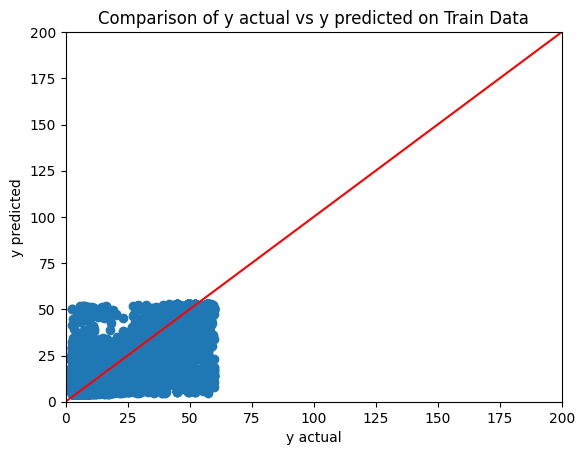

In [64]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_train, y_train_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

#### 4.2. Predict & evaluate on test data
---

In [65]:
# Predict (JUST RUN THE CODE)
y_test_pred = reg_best.predict(X_test_clean)

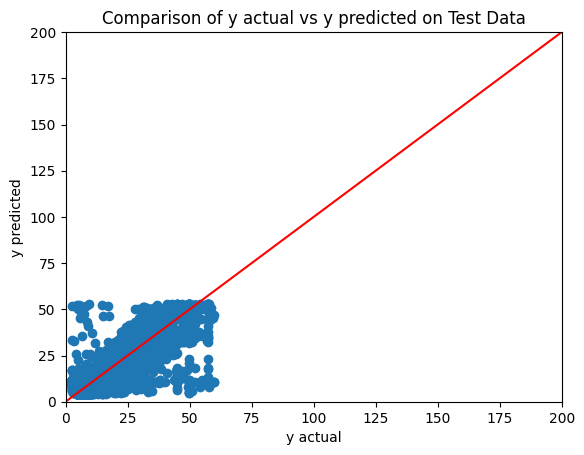

In [66]:
# Visualize & compare the prediction (JUST RUN THE CODE)
plt.scatter(y_test, y_test_pred)

plt.plot([0, 200], [0, 200], c='red')
plt.xlim(0, 200); plt.ylim(0, 200)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()